In [1]:
import os, math, random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import utility_functions

Using TensorFlow backend.


In [2]:
model = load_model("Models/improved_augmented_cnn_v5.h5")

In [3]:
num_to_letter = {0: 'Alef',
    1: 'Ayin',
    2: 'Bet',
    3: 'Dalet',
    4: 'Gimel',
    5: 'He',
    6: 'Het',
    7: 'Kaf',
    8: 'Kaf-final',
    9: 'Lamed',
    10: 'Mem',
    11: 'Mem-medial',
    12: 'Nun-final',
    13: 'Nun-medial',
    14: 'Pe',
    15: 'Pe-final',
    16: 'Qof',
    17: 'Resh',
    18: 'Samekh',
    19: 'Shin',
    20: 'Taw',
    21: 'Tet',
    22: 'Tsadi-final',
    23: 'Tsadi-medial',
    24: 'Waw',
    25: 'Yod',
    26: 'Zayin',
    27: 'Multi-letter',
    28: 'Noise'}
        
letter_to_num = {'Alef': 0,
 'Ayin': 1,
 'Bet': 2,
 'Dalet': 3,
 'Gimel': 4,
 'He': 5,
 'Het': 6,
 'Kaf': 7,
 'Kaf-final': 8,
 'Lamed': 9,
 'Mem': 10,
 'Mem-medial': 11,
 'Nun-final': 12,
 'Nun-medial': 13,
 'Pe': 14,
 'Pe-final': 15,
 'Qof': 16,
 'Resh': 17,
 'Samekh': 18,
 'Shin': 19,
 'Taw': 20,
 'Tet': 21,
 'Tsadi-final': 22,
 'Tsadi-medial': 23,
 'Waw': 24,
 'Yod': 25,
 'Zayin': 26,
 'Multi-letter':27,
 'Noise':28}

In [5]:
data_path = "../Final_Test_Data/Annotated/"
n_datapoints = len(os.listdir(data_path))

test_images = np.zeros([n_datapoints,28,28])
test_labels = np.zeros([n_datapoints])

i = 0
for image in os.listdir(data_path):
    if(image.endswith(".jpg") or image.endswith(".png")):
        letter = image.split("_")[0]
        raw_image = cv2.imread(data_path+image,0)
        preprocesed_image = utility_functions.preprocess_single_letter(raw_image)
        #thinned_image = utility_functions.zhangSuen(preprocesed_image)
        test_images[i] = (preprocesed_image-0.18588859)/0.35586226
        test_labels[i] = letter_to_num[letter]
    
        i+=1


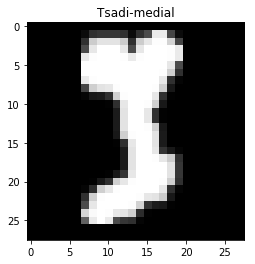

In [8]:
i = random.randint(0,n_datapoints-1)
plt.imshow(test_images[i],cmap="gray")
plt.title(num_to_letter[test_labels[i]])
plt.show()

In [9]:
x = test_images.reshape([n_datapoints,28,28,1])
p = model.predict_proba(x)


In [10]:
confusion_matrix = np.zeros([29,29])
wrong_images = 0.5*np.zeros([300,28,28])
wrong_labels = np.zeros([300])
wi = 0
for i in range(n_datapoints):
    top = np.argsort(-p[i,:])[0]
    
    confusion_matrix[int(test_labels[i]),top] += 1
    
    if(top != test_labels[i]):
        wrong_images[wi,:,:] = test_images[i]
        wrong_labels[wi] = top
        wi+=1 
print("acc: {}".format(np.sum(np.diag(confusion_matrix))/n_datapoints))

acc: 0.4786729857819905


In [11]:
wi

110

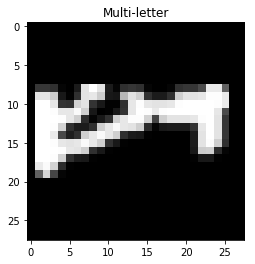

Multi-letter


In [15]:
i=20
plt.imshow(test_images[i],cmap="gray")
plt.title(num_to_letter[test_labels[i]])
plt.show()
print(num_to_letter[wrong_labels[i]])

In [ ]:
[num_to_letter[index] for index in wrong_labels[:wi]]

In [ ]:
i = np.argmax(confusion_matrix[letter_to_num["Multi-letter"],:])
print(confusion_matrix[letter_to_num["Multi-letter"],:])
num_to_letter[i]

In [ ]:
plt.matshow(confusion_matrix,cmap="binary")
plt.show()

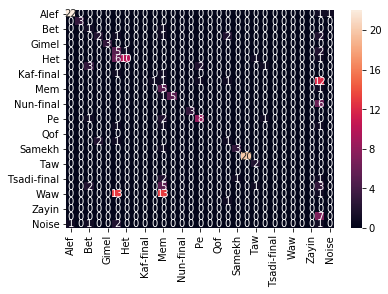

In [16]:
import pandas as pd
f_cm = pd.DataFrame(confusion_matrix, index = letter_to_num.keys(),
                  columns = letter_to_num.keys())
import seaborn as sn
%matplotlib inline
sn.heatmap(f_cm, annot = True)

In [ ]:
np.sum(test_labels == 27)

In [ ]:
plt.hist(test_labels)

In [ ]:
a = np.zeros([4,4])

In [ ]:
a[[1,0,3],1] = 1

In [ ]:
a

In [ ]:
img = cv2.imread("../Final_Test_Data/Annotated/Waw_R_1.jpg",0)
plt.imshow(img,cmap="gray")

In [ ]:
preprocesed_image = utility_functions.preprocess_image(img)
thinned_image = utility_functions.zhangSuen(preprocesed_image)

plt.imshow(thinned_image,cmap="gray")

In [ ]:
def pad_image(image, padding, value):
    height, width = np.shape(image)
    
    new_image = value*np.ones([height+2*padding, width+2*padding])
    
    new_image[padding:padding+height, padding:padding+width] = image.copy()
    
    return new_image

In [ ]:
plt.imshow(pad_image(img,2,255),cmap="gray")